# Evaluating Simple Linear Regression
An example of evaluating our Simple Linear Regression model on some data about taxi trips

## 1. Import libraries and load data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv("data/taxi_data.csv")

## 2. Determine if we can use Simple Linear Regression
* Data must be quantitative
* Data must have a linear relationship
* Residuals must be normally distributed

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


<Axes: title={'center': 'fare vs distance traveled'}, xlabel='distance_traveled', ylabel='fare'>

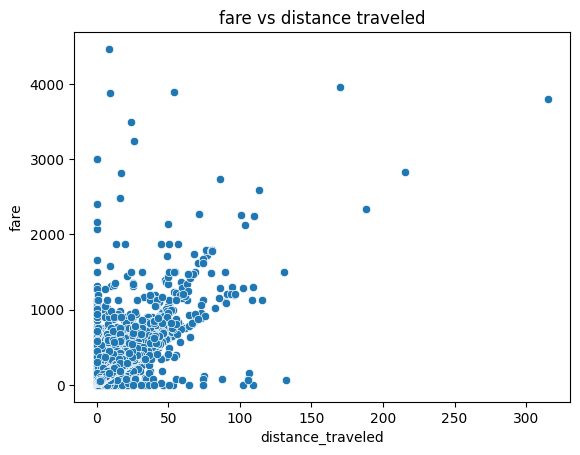

In [26]:
plt.title("fare vs distance traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")

In [25]:
# Get the row with the outlier
df.loc[df["distance_traveled"] == df["distance_traveled"].max()]

# df = df.drop(df.loc[df["distance_traveled"] == df["distance_traveled"].max()].index)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
34734,13755.0,315.25,1.0,3802.5,0,55.125,3857.625,0


We've removed two outliers row with a distance of 1136.5 and 61.95 price, 

## 3. Create the Model

In [29]:
# Extract the data
X_train = df[["distance_traveled"]]
y_train = df["fare"]

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[14.11940761] 32.19101424810921


## 4. Plot the Line of Best Fit

In [30]:
y_pred = model.predict(X_train)


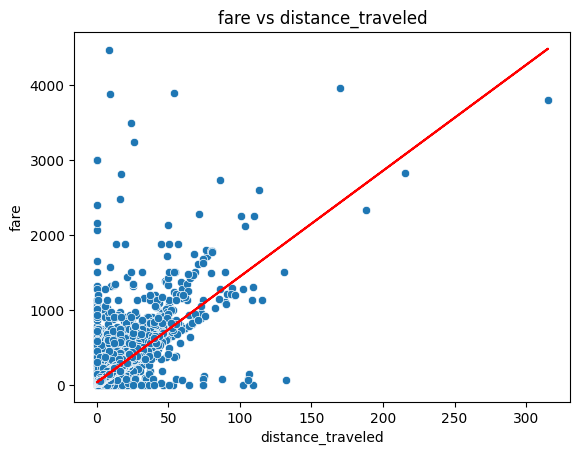

In [31]:
# Plot the line of best fit
plt.title("fare vs distance_traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")
plt.plot(X_train, y_pred, color="r")

## 5. Check the Distribution of Residuals

In [33]:
# Calculate Residuals
residuals = y_train - y_pred

(-250.0, 250.0)

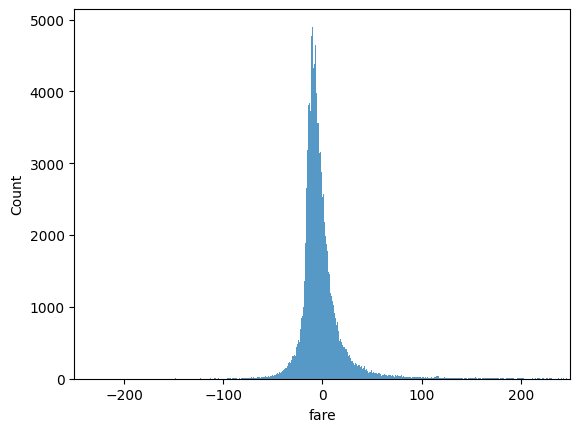

In [35]:
# Graph the residuals
ax = sns.histplot(residuals)
ax.set_xlim(xmin=-250, xmax=250)

<Axes: xlabel='distance_traveled', ylabel='fare'>

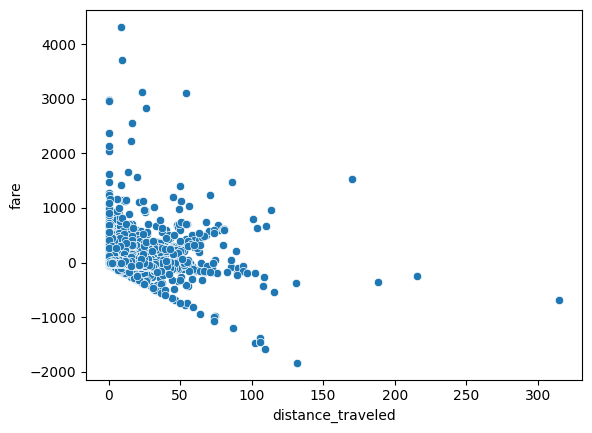

In [36]:
# Scatterplot residuals
sns.scatterplot(data=X_train, x="distance_traveled", y=residuals)

## 6. Evaluate our Model

In [37]:
# Calculate R-Squared
model.score(X_train, y_train)

0.6965004131309875